In [30]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

data


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<font color = green >

### Різні регресії на прикладі одної з фіч BMI
</font>

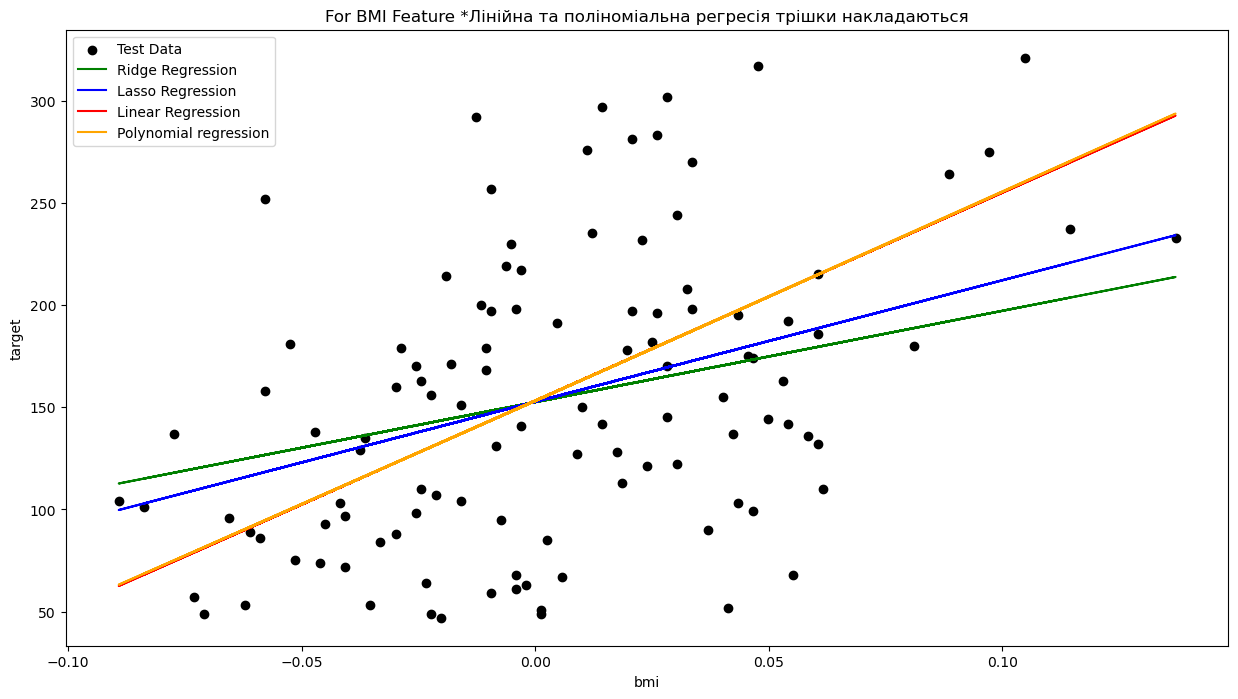

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 2].reshape(-1, 1), y, random_state=0)

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# Lasso regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

# Linear regression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
linearRegression_predictions = linearRegression.predict(X_test)

# Polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(poly_features_test)

plt.figure(figsize=(15, 8))

plt.scatter(X_test, y_test, label='Test Data', color='black')
plt.plot(X_test, ridge_predictions, label='Ridge Regression', color='green')
plt.plot(X_test, lasso_predictions, label='Lasso Regression', color='blue')
plt.plot(X_test, linearRegression_predictions, label='Linear Regression', color='red')
plt.plot(X_test, poly_reg_y_predicted, label='Polynomial regression', color='orange')

plt.title('For BMI Feature *Лінійна та поліноміальна регресія трішки накладаються')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()


### Multiple features

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
linearRegression_predictions = linearRegression.predict(X_test)
linearRegression_mse = mean_squared_error(y_test, linearRegression_predictions)
print(f'Linear Mean Squared Error: {linearRegression_mse}')

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Mean Squared Error: {ridge_mse}')

# Lasso regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Mean Squared Error: {lasso_mse}')

# Polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(poly_features_test)
poly_reg_mse = mean_squared_error(y_test, poly_reg_y_predicted)
print(f'Polynomial Mean Squared Error: {poly_reg_mse}')

# Also calculating R2 for each regression
linearRegression_r2 = linearRegression.score(X_test, y_test)
print(f'Linear R2: {linearRegression_r2}')


ridge_r2 = ridge.score(X_test, y_test)
print(f'Ridge R2: {ridge_r2}')


lasso_r2 = lasso.score(X_test, y_test)
print(f'Lasso R2: {lasso_r2}')

poly_r2 = poly_reg_model.score(poly_features_test, y_test)
print(f'Polynomial R2: {poly_r2}')


Linear Mean Squared Error: 2958.795842993377
Ridge Mean Squared Error: 3459.1847048909594
Lasso Mean Squared Error: 3709.533043125143
Polynomial Mean Squared Error: 3442.5530444296896
Linear R2: 0.48698367794381514
Ridge R2: 0.40022282415375776
Lasso R2: 0.3568157117577079
Polynomial R2: 0.4031065355459218


### Implement Normal Equation 

In [34]:
import numpy as np

# Додаю одиничний стовпець до матриці 
X_b = np.column_stack([np.ones(len(X)), X])

# Для обчислення theta_best використовую методу найменших квадратів
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Витягнути інтерцепт та коефіцієнти
intercept = theta_best[0]
coef = theta_best[1:]

print(f"Intercept: {intercept}  \nCoefficients: {coef}")

Intercept: 152.13348416289597  
Coefficients: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


### Для прикладу, спробую використовуючи данний алгоритм визначити прогрес хвороби

In [36]:
first_row =	[0.038076, 0.050680, 0.061696, 0.021872, -0.044223, -0.034821, -0.043401, -0.002592, 0.019907, -0.017646]

predicted_value = intercept + np.dot(coef, first_row)

print(f"Predicted Value: {predicted_value}")

Predicted Value: 206.11563847871102
